# Stock Market Analysis and Trading Strategy Development

## Project Overview

This notebook presents a comprehensive analysis of Nifty 50 stocks over the last 6 months. The project includes:


1. **Task 1: Stock Data Analysis**
   - Fetch historical stock data using the `yfinance` library.
   - Calculate daily percentage changes and moving averages.
   - Visualize closing prices and percentage changes.

2. **Task 2: Strategy Development**
   - Develop a moving average crossover trading strategy.
   - Generate buy and sell signals based on moving averages.
   - Backtest the strategy and compare its performance with a buy-and-hold approach.


3. **Task 3: Risk Management**
   - Calculate maximum drawdown for each stock.
   - Implement a stop-loss mechanism and compare its performance to the original strategy.


In [1]:
pip install yfinance

     ---------------------------------------- 0.0/3.0 MB ? eta -:--:--
     - -------------------------------------- 0.1/3.0 MB 2.6 MB/s eta 0:00:02
     -- ------------------------------------- 0.2/3.0 MB 1.8 MB/s eta 0:00:02
     --- ------------------------------------ 0.3/3.0 MB 1.9 MB/s eta 0:00:02
     ------ --------------------------------- 0.5/3.0 MB 2.2 MB/s eta 0:00:02
     --------- ------------------------------ 0.7/3.0 MB 2.8 MB/s eta 0:00:01
     ------------ --------------------------- 0.9/3.0 MB 3.1 MB/s eta 0:00:01
     --------------- ------------------------ 1.2/3.0 MB 3.4 MB/s eta 0:00:01
     ------------------- -------------------- 1.5/3.0 MB 3.7 MB/s eta 0:00:01
     ---------------------- ----------------- 1.7/3.0 MB 4.0 MB/s eta 0:00:01
     ------------------------- -------------- 1.9/3.0 MB 4.0 MB/s eta 0:00:01
     ----------------------------- ---------- 2.2/3.0 MB 4.3 MB/s eta 0:00:01
     -------------------------------- ------- 2.4/3.0 MB 4.3 MB/s eta 0


[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
stocks = ['RELIANCE.NS', 'TCS.NS', 'INFY.NS', 'HDFCBANK.NS', 'ITC.NS']
data = yf.download(stocks, start='2023-03-23', end='2023-09-23')

[*********************100%***********************]  5 of 5 completed


In [4]:
daily_percentage_change = data['Adj Close'].pct_change() * 100

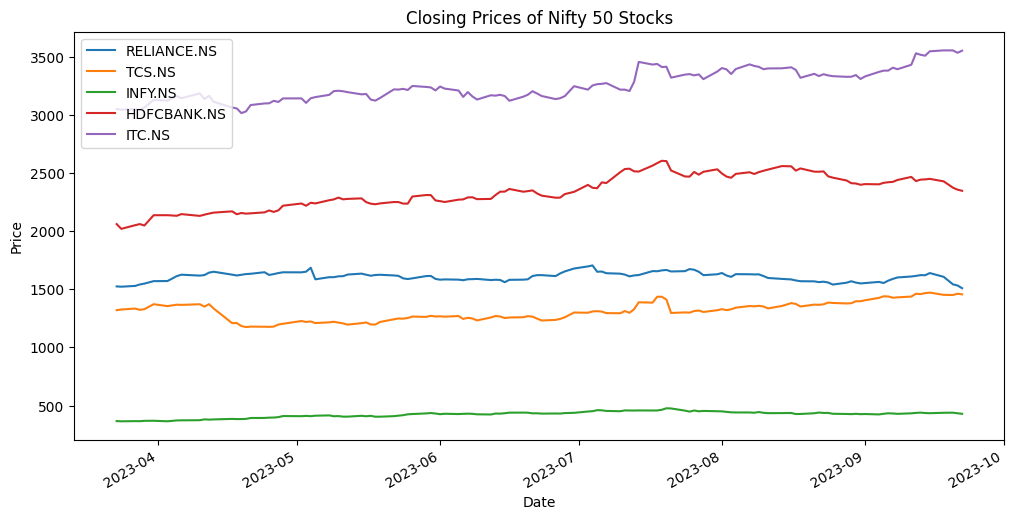

In [5]:
data['Adj Close'].plot(figsize=(12, 6), title='Closing Prices of Nifty 50 Stocks')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend(stocks)
plt.show()

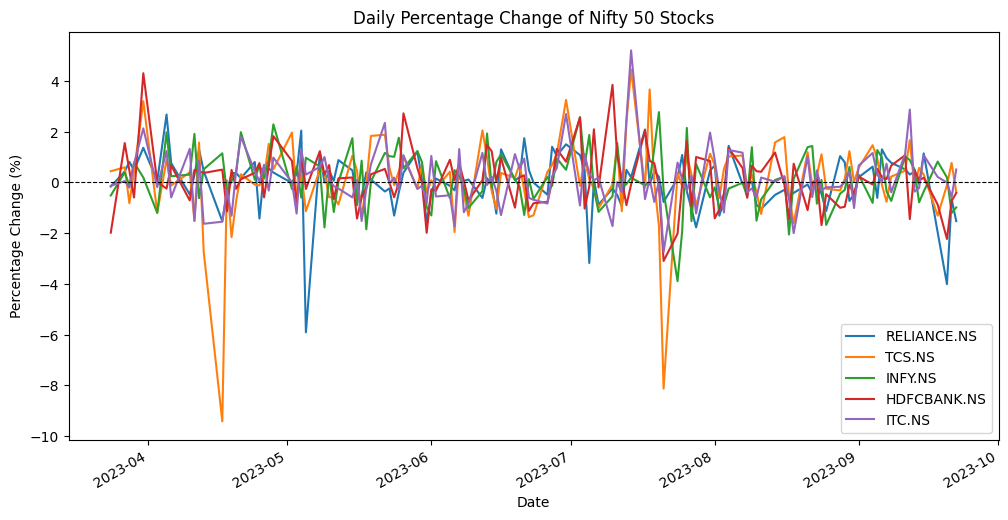

In [6]:
daily_percentage_change.plot(figsize=(12, 6), title='Daily Percentage Change of Nifty 50 Stocks')
plt.xlabel('Date')
plt.ylabel('Percentage Change (%)')
plt.legend(stocks)
plt.axhline(0, color='black', linewidth=0.8, linestyle='--')  # Adds a line at 0%
plt.show()


In [7]:
moving_average_20 = data['Adj Close'].rolling(window=20).mean()


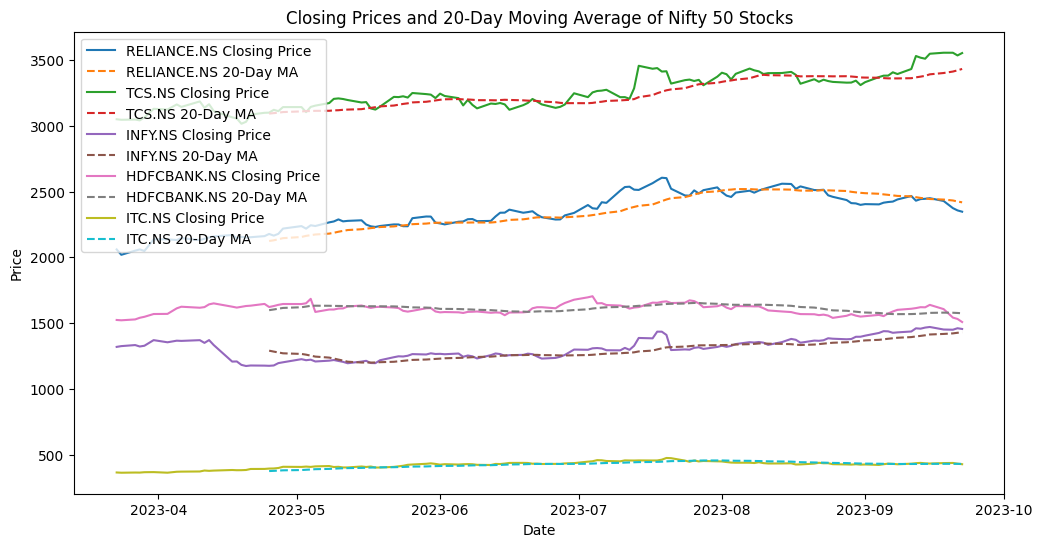

In [8]:
plt.figure(figsize=(12, 6))
for stock in stocks:
    plt.plot(data['Adj Close'][stock], label=f'{stock} Closing Price')
    plt.plot(moving_average_20[stock], label=f'{stock} 20-Day MA', linestyle='--')

plt.title('Closing Prices and 20-Day Moving Average of Nifty 50 Stocks')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


### Calculate the Short-Term and Long-Term Moving Averages
### We'll use the 50-day moving average as the short-term and the 200-day moving average as the long-term for one of the stocks (let's say Reliance).

In [9]:
short_window = 50
long_window = 200

moving_average_short = data['Adj Close']['RELIANCE.NS'].rolling(window=short_window).mean()
moving_average_long = data['Adj Close']['RELIANCE.NS'].rolling(window=long_window).mean()


Generate Buy and Sell Signals with Improved Logic

In [10]:

signals = pd.DataFrame(index=data.index)
signals['Price'] = data['Adj Close']['RELIANCE.NS']
signals['Short_MA'] = moving_average_short
signals['Long_MA'] = moving_average_long

# Create signals
signals['Signal'] = 0
signals['Signal'][short_window:] = np.where(signals['Short_MA'][short_window:] > signals['Long_MA'][short_window:], 1, 0)
signals['Position'] = signals['Signal'].diff()

# Buy signal when the position changes from 0 to 1
signals['Buy'] = np.where(signals['Position'] == 1, signals['Price'], np.nan)
# Sell signal when the position changes from 0 to -1
signals['Sell'] = np.where(signals['Position'] == -1, signals['Price'], np.nan)


C:\Users\Dell\AppData\Local\Temp\ipykernel_4624\2869808567.py:8: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  signals['Signal'][short_window:] = np.where(signals['Short_MA'][short_window:] > signals['Long_MA'][short_window:], 1, 0)
C:\Users

calculate the returns from the strategy and compare it with a buy-and-hold strategy

In [11]:
# Calculate daily returns
signals['Market_Returns'] = signals['Price'].pct_change()

# Initialize a column for strategy returns
signals['Strategy_Returns'] = signals['Market_Returns'] * signals['Signal'].shift(1)

# Calculate cumulative returns for both strategies
signals['Cumulative_Market_Returns'] = (1 + signals['Market_Returns']).cumprod()
signals['Cumulative_Strategy_Returns'] = (1 + signals['Strategy_Returns']).cumprod()


visualize the cumulative returns of both the moving average crossover strategy and the buy-and-hold approach.

Plot Cumulative Returns

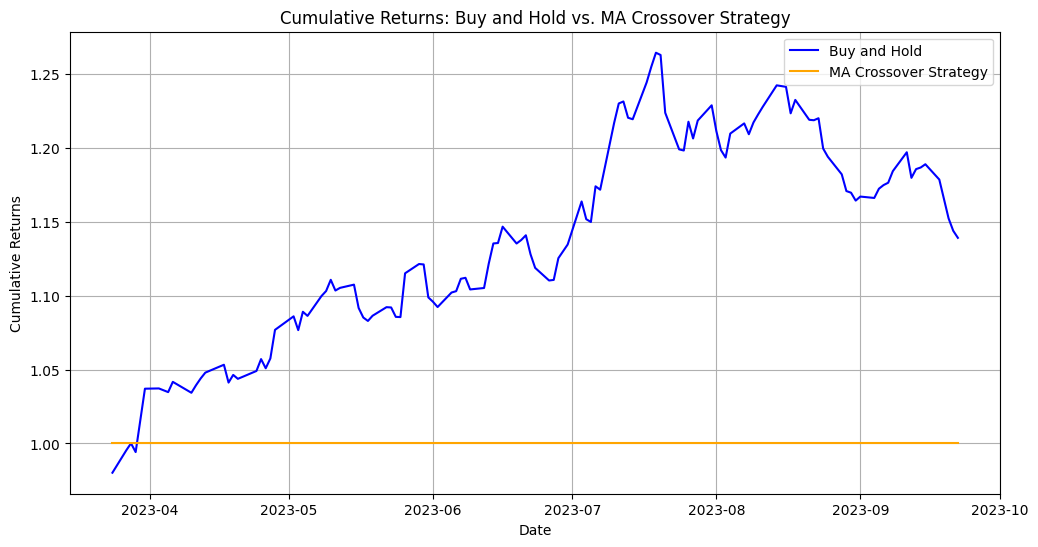

In [12]:
plt.figure(figsize=(12, 6))
plt.plot(signals['Cumulative_Market_Returns'], label='Buy and Hold', color='blue')
plt.plot(signals['Cumulative_Strategy_Returns'], label='MA Crossover Strategy', color='orange')
plt.title('Cumulative Returns: Buy and Hold vs. MA Crossover Strategy')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.legend()
plt.grid()
plt.show()


Calculate Maximum Drawdown for Each Stock


Maximum drawdown measures the largest peak-to-trough decline in the value of an investment.

In [13]:
def max_drawdown(prices):
    """Calculate the maximum drawdown."""
    cumulative_returns = (1 + prices.pct_change()).cumprod()
    peak = cumulative_returns.cummax()
    drawdown = (cumulative_returns - peak) / peak
    return drawdown.min()

# Calculate maximum drawdown for each stock
max_drawdowns = {}
for stock in stocks:
    max_drawdowns[stock] = max_drawdown(data['Adj Close'][stock])

max_drawdowns


{'RELIANCE.NS': -0.09902983959058542,
 'TCS.NS': -0.053257236343787415,
 'INFY.NS': -0.1434572502813166,
 'HDFCBANK.NS': -0.11488832753752018,
 'ITC.NS': -0.11104339012589626}

Implementing the Stop-Loss Mechanism

We'll assume a stop-loss of 5%. The strategy will exit a position if the price drops 5% below the last purchase price.

In [14]:
stop_loss_percentage = 0.05

# Create a new column for stop-loss prices
signals['Stop_Loss_Price'] = signals['Price'] * (1 - stop_loss_percentage)

# Implement stop-loss logic
signals['Stop_Loss_Signal'] = 0

for i in range(1, len(signals)):
    # If we have a position and the price falls below the stop-loss price
    if signals['Position'][i-1] == 1 and signals['Price'][i] < signals['Stop_Loss_Price'][i]:
        signals['Stop_Loss_Signal'][i] = -1  # Indicate a sell signal due to stop-loss
    else:
        signals['Stop_Loss_Signal'][i] = signals['Position'][i-1]  # Keep the previous position

# Add a column for the new strategy position
signals['New_Position'] = signals['Stop_Loss_Signal'].diff()


C:\Users\Dell\AppData\Local\Temp\ipykernel_4624\4036758818.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if signals['Position'][i-1] == 1 and signals['Price'][i] < signals['Stop_Loss_Price'][i]:
C:\Users\Dell\AppData\Local\Temp\ipykernel_4624\4036758818.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  signals['Stop_Loss_Signal'][i] = signals['Position'][i-1]  # Keep the previous position
C:\Users\Dell\AppData\Local\Temp\ipykernel_4624\4036758818.py:14: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certa

calculate the returns for the updated strategy that includes the stop-loss mechanism.

Calculate Returns with Stop-Loss

In [15]:
# Initialize a column for new strategy returns
signals['New_Strategy_Returns'] = signals['Market_Returns'] * signals['Stop_Loss_Signal'].shift(1)

# Calculate cumulative returns for the new strategy
signals['Cumulative_New_Strategy_Returns'] = (1 + signals['New_Strategy_Returns']).cumprod()


visualize the cumulative returns of the original strategy and the new strategy with the stop-loss mechanism.

Plot Cumulative Returns with Stop-Loss

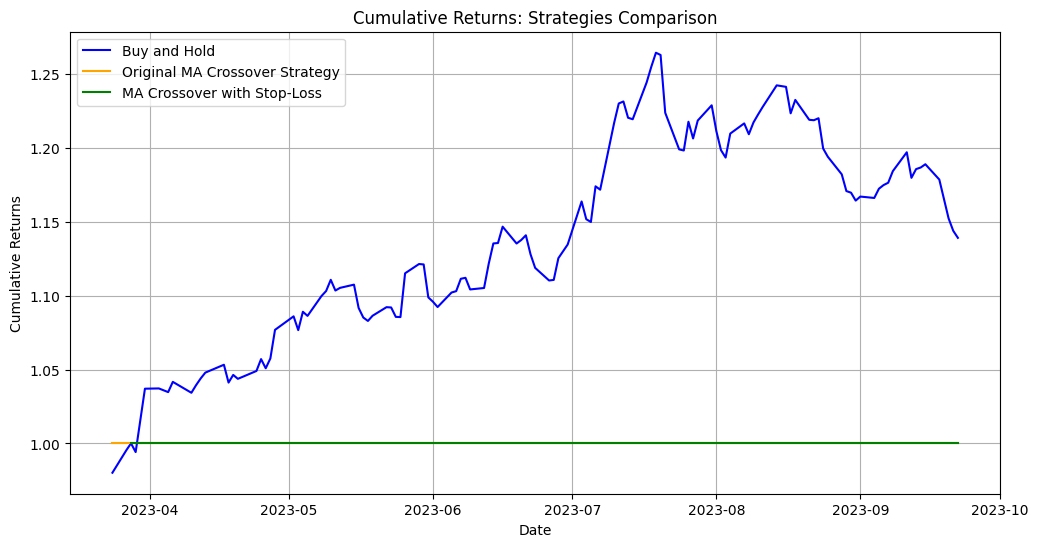

In [16]:
plt.figure(figsize=(12, 6))
plt.plot(signals['Cumulative_Market_Returns'], label='Buy and Hold', color='blue')
plt.plot(signals['Cumulative_Strategy_Returns'], label='Original MA Crossover Strategy', color='orange')
plt.plot(signals['Cumulative_New_Strategy_Returns'], label='MA Crossover with Stop-Loss', color='green')
plt.title('Cumulative Returns: Strategies Comparison')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.legend()
plt.grid()
plt.show()


<h4>OUR WORK <br>

<br>
Task 1: Stock Data Analysis

Fetched Historical Data: We used the yfinance library to get the stock prices for 5 companies from the Nifty 50 index over the last 6 months.


Analyzed Data:

Daily Percentage Change: We calculated how much each stock's price changed daily, in percentage terms.

Plotted Data: We created visualizations for:

Closing prices of the stocks.
Daily percentage changes.
Moving Average: We calculated and plotted a 20-day moving average to understand trends in the stock prices.


Task 2: Strategy Development

Moving Average Crossover Strategy: We developed a trading strategy based on two moving averages:
Short-Term (50-day) and Long-Term (200-day).
Buy/Sell Signals: We generated signals:
Buy when the short-term average crosses above the long-term average.
Sell when it crosses below.
Backtesting: We compared the performance of this strategy against simply buying and holding the stocks over the same period by calculating and plotting cumulative returns.


Task 3: Risk Management

Maximum Drawdown: We calculated the maximum drawdown for each stock, which measures the largest decline from a peak to a trough.
Stop-Loss Mechanism: For the stock used in Task 2 (Reliance):
Implemented a stop-loss of 5%, which sells the stock if its price drops by that percentage from the last purchase price.
Performance Comparison: We compared the performance of the original strategy with the new one that included the stop-loss, visualizing the cumulative returns for both.</h4>

## Advanced Visualizations

In [18]:
pip install plotly

   ---------------------------------------- 0.0/19.1 MB ? eta -:--:--
   ---------------------------------------- 0.1/19.1 MB 2.3 MB/s eta 0:00:09
    --------------------------------------- 0.3/19.1 MB 3.5 MB/s eta 0:00:06
    --------------------------------------- 0.4/19.1 MB 3.4 MB/s eta 0:00:06
   - -------------------------------------- 0.7/19.1 MB 3.6 MB/s eta 0:00:06
   - -------------------------------------- 0.9/19.1 MB 4.2 MB/s eta 0:00:05
   -- ------------------------------------- 1.2/19.1 MB 5.0 MB/s eta 0:00:04
   --- ------------------------------------ 1.5/19.1 MB 5.1 MB/s eta 0:00:04
   --- ------------------------------------ 1.9/19.1 MB 5.4 MB/s eta 0:00:04
   ---- ----------------------------------- 2.2/19.1 MB 5.8 MB/s eta 0:00:03
   ----- ---------------------------------- 2.5/19.1 MB 5.8 MB/s eta 0:00:03
   ----- ---------------------------------- 2.8/19.1 MB 6.1 MB/s eta 0:00:03
   ------ --------------------------------- 3.2/19.1 MB 6.3 MB/s eta 0:00:03
   ---


[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
import plotly.io as pio
pio.renderers.default = 'notebook'


In [21]:
import plotly.graph_objects as go

# Create an interactive plot for closing prices
fig = go.Figure()

for stock in stocks:
    fig.add_trace(go.Scatter(x=data.index, y=data['Adj Close'][stock], mode='lines', name=stock))

fig.update_layout(title='Interactive Closing Prices of Nifty 50 Stocks',
                  xaxis_title='Date',
                  yaxis_title='Closing Price',
                  legend_title='Stocks')
fig.show()


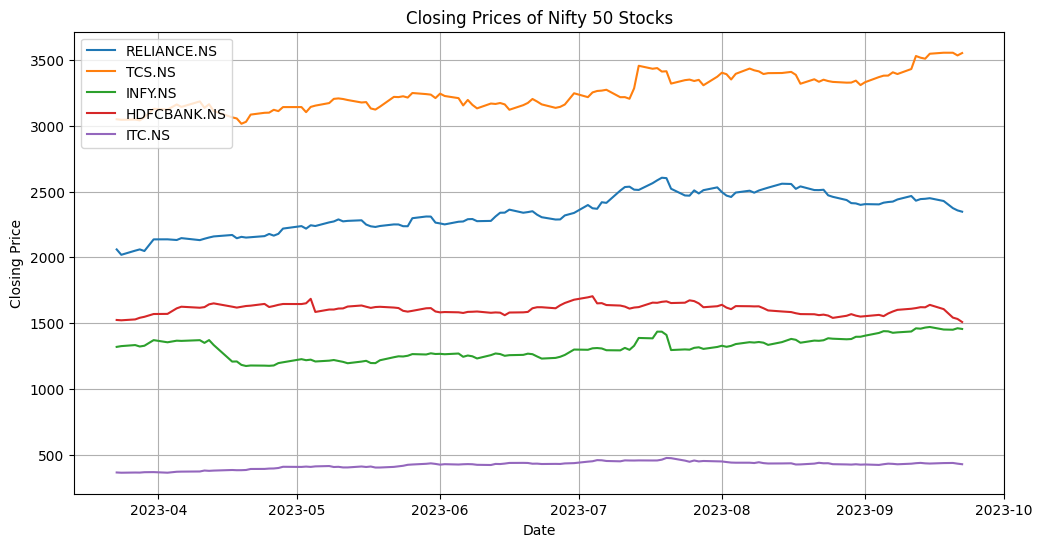

In [22]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

for stock in stocks:
    plt.plot(data.index, data['Adj Close'][stock], label=stock)

plt.title('Closing Prices of Nifty 50 Stocks')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.grid()
plt.show()


Optimize Parameters

Closing Prices with Moving Averages 

KeyError: 'Short_MA'

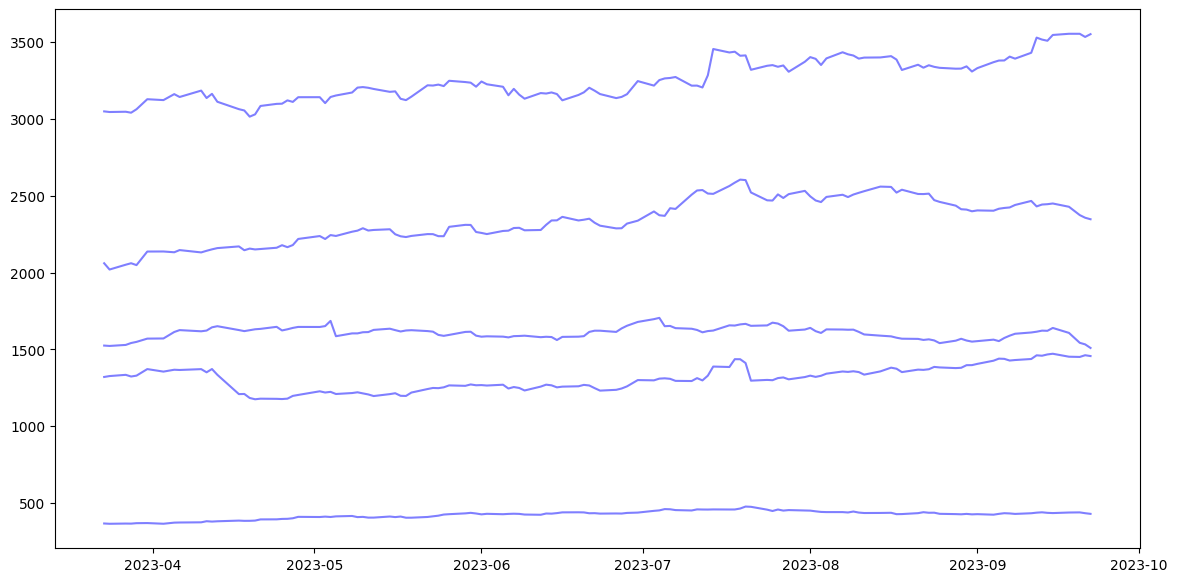

In [27]:
import matplotlib.pyplot as plt

# Plotting closing prices and moving averages
plt.figure(figsize=(14, 7))
plt.plot(data['Adj Close'], label='Closing Price', color='blue', alpha=0.5)
plt.plot(data['Short_MA'], label='Short Moving Average', color='orange', linestyle='--')
plt.plot(data['Long_MA'], label='Long Moving Average', color='red', linestyle='--')
plt.title('Closing Prices with Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid()
plt.show()
